In [1]:
RESULTS_ZIP_FILE = "../../results/pix2code/pix2code_web_with_html_loremipsum.zip"
RESULTS_FOLDER_DESTINATION = "../../results/pix2code"

In [2]:
import zipfile

with zipfile.ZipFile(RESULTS_ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(RESULTS_FOLDER_DESTINATION)


In [3]:
RESULTS_FOLDER = "../../results/pix2code/pix2code_web_with_html_loremipsum"

In [4]:
import os

list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

350

In [5]:
%run ../../utils/postprocessing.py --folder ../../results/pix2code/pix2code_web_with_html_loremipsum --suffix .txt --pix2code

  0%|          | 0/350 [00:00<?, ?it/s]

100%|██████████| 350/350 [00:00<00:00, 5818.98it/s]


In [6]:
%run ../../utils/extract_screenshots --folder ../../results/pix2code/pix2code_web_with_html_loremipsum

100%|██████████| 350/350 [07:01<00:00,  1.20s/it]


In [43]:
# NOTE: this was run from command line to use multiprocessing
#%run ../../utils/calculate_metrics --folder ../../results/pix2code/pix2code_web_with_html_loremipsum 

In [4]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [5]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [6]:
df.describe()

,len_pren,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance,similarity_index,prediction_length
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2547.502857,2550.040000,2552.565714,0.974308,29.645714,0.023285,0.998041,0.114286,0.002372,0.993905,2547.502857
std,306.069106,308.150347,307.167866,0.020108,16.156568,0.018988,0.008528,0.465563,0.009898,0.003110,306.069106
min,1575.000000,1578.000000,1578.000000,0.872576,5.000000,0.003298,0.941495,0.000000,0.000000,0.985377,1575.000000
25%,2583.000000,2590.500000,2590.500000,0.970047,16.500000,0.012710,1.000000,0.000000,0.000000,0.991931,2583.000000
50%,2654.000000,2660.000000,2660.000000,0.977856,29.000000,0.019949,1.000000,0.000000,0.000000,0.993817,2654.000000
75%,2705.000000,2708.500000,2713.000000,0.985652,39.000000,0.027137,1.000000,0.000000,0.000000,0.996611,2705.000000
max,3078.000000,3083.000000,3083.000000,0.995707,91.000000,0.115658,1.000000,2.000000,0.057143,0.999505,3078.000000


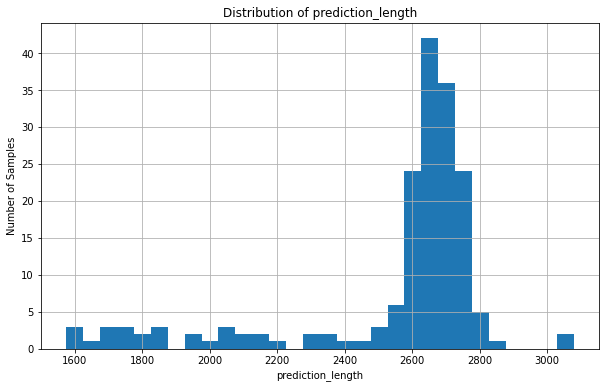

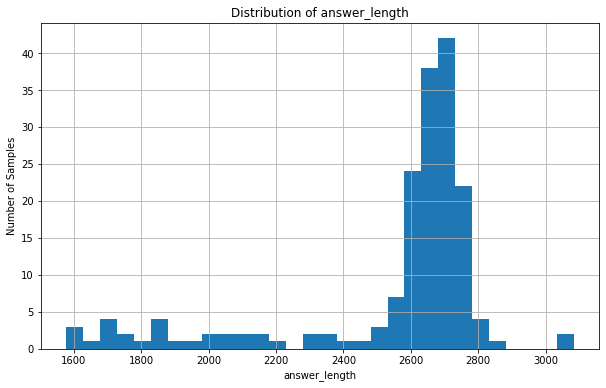

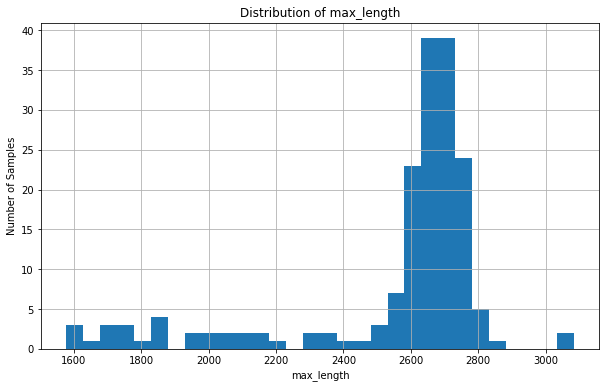

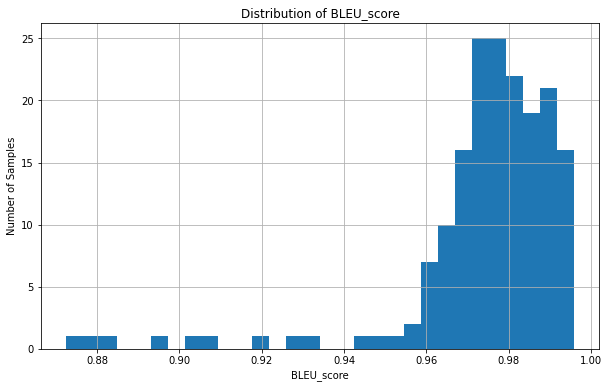

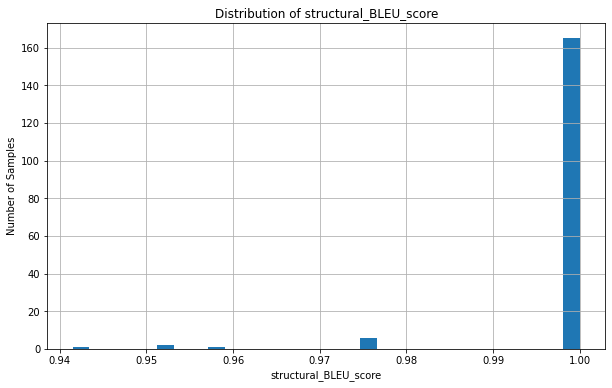

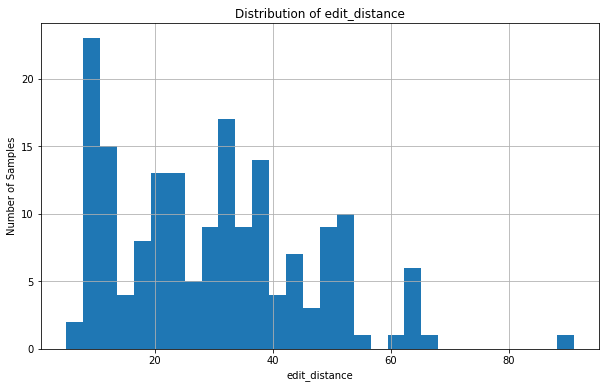

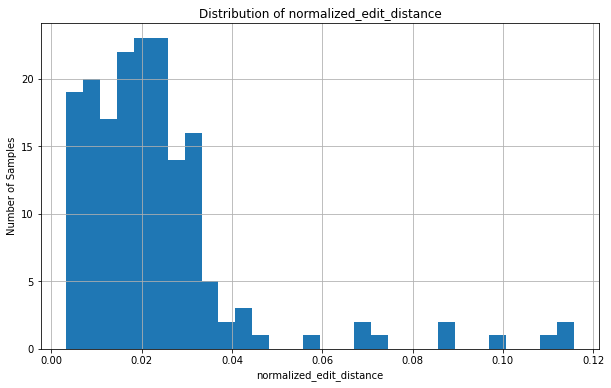

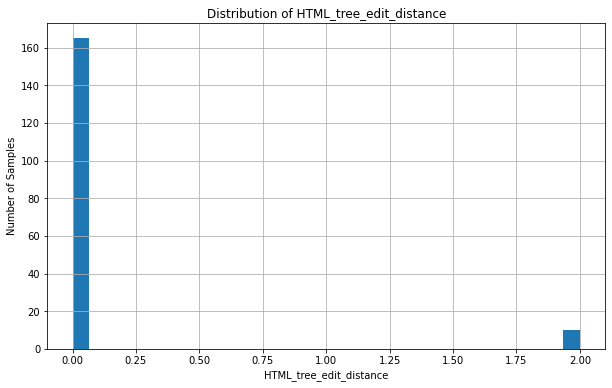

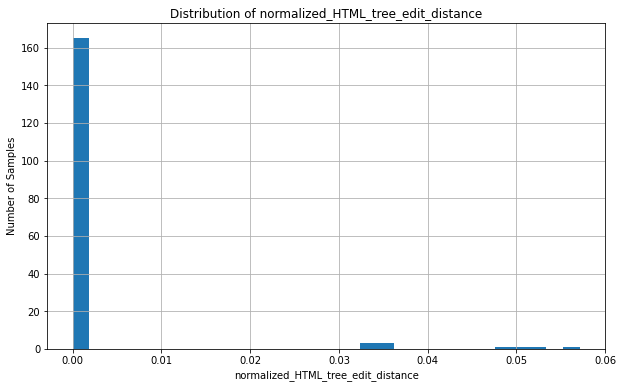

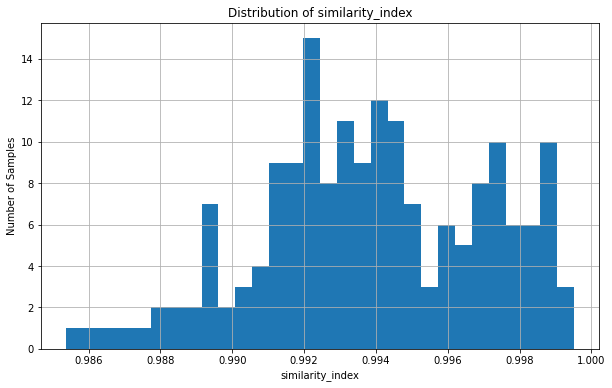

In [7]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "structural_BLEU_score", "edit_distance", "normalized_edit_distance", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance" , "similarity_index"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


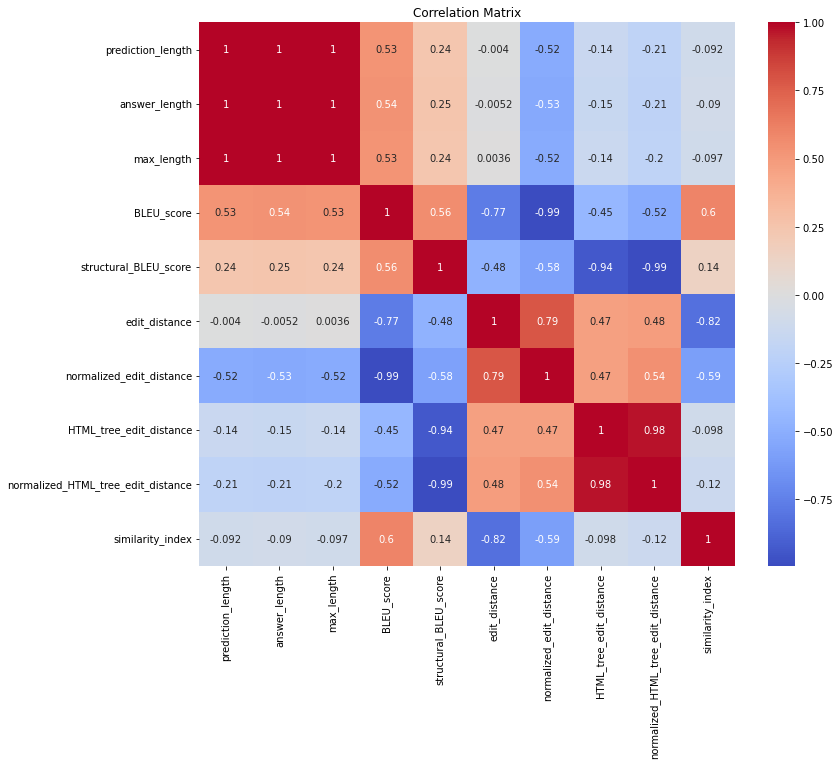

In [8]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

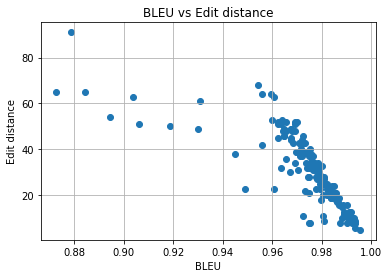

In [10]:
plt.scatter(df["BLEU_score"], df["edit_distance"])
plt.title("BLEU vs Edit distance")
plt.xlabel("BLEU")
plt.ylabel("Edit distance")
plt.grid(True)
plt.show()


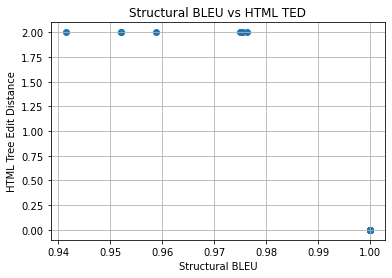

In [11]:
plt.scatter(df["structural_BLEU_score"], df["HTML_tree_edit_distance"])
plt.title("Structural BLEU vs HTML TED")
plt.xlabel("Structural BLEU")
plt.ylabel("HTML Tree Edit Distance")
plt.grid(True)
plt.show()


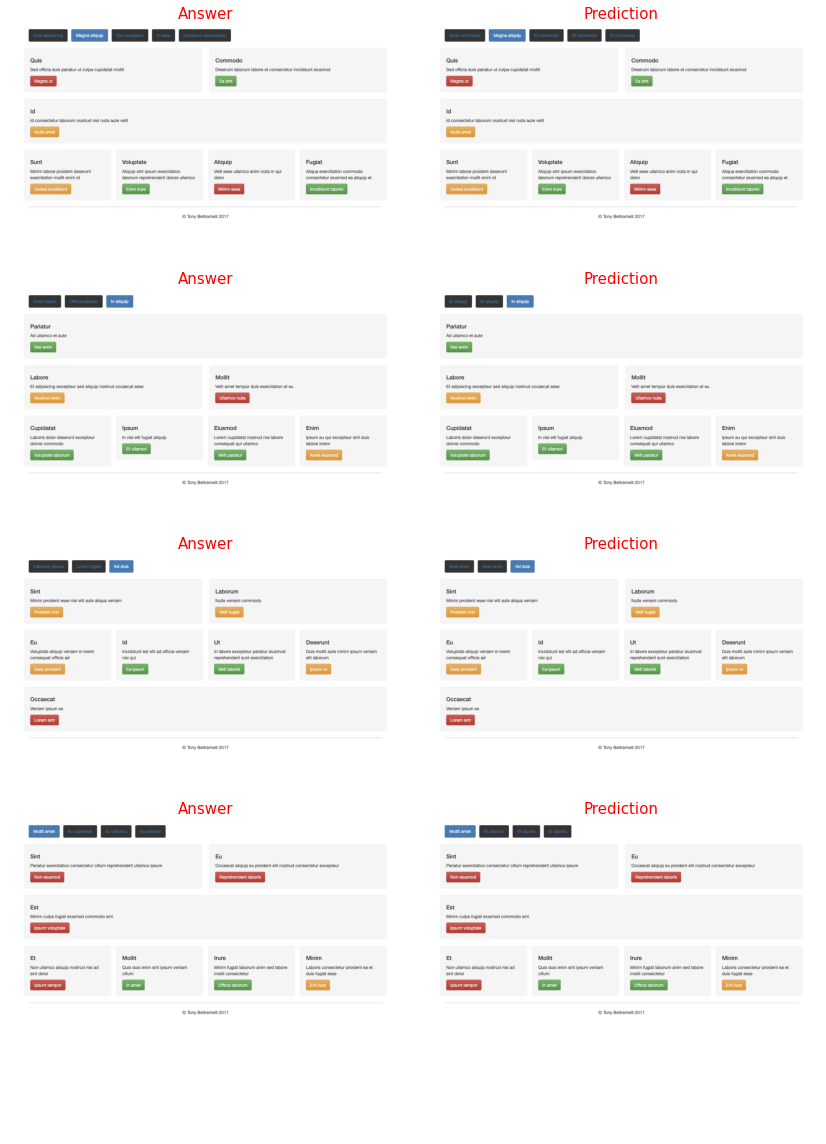

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NUMBER_DISPLAYED = 4

fig, axes = plt.subplots(NUMBER_DISPLAYED, 2, figsize=(13, NUMBER_DISPLAYED*4))

for idx, json_file_path in enumerate(all_json_files[:NUMBER_DISPLAYED]):
        answer_img = mpimg.imread(json_file_path.replace(".json", "_answer_processed.png"))
        prediction_img = mpimg.imread(json_file_path.replace(".json", "_pred_processed.png"))
        
        axes[idx, 0].imshow(answer_img)
        axes[idx, 0].set_title('Answer', fontsize=15, color="red")
        axes[idx, 0].axis('off')
        
        axes[idx, 1].imshow(prediction_img)
        axes[idx, 1].set_title('Prediction', fontsize=15, color="red")
        axes[idx, 1].axis('off')

plt.tight_layout(h_pad=-7)

plt.show()
